 # Neural Networks for Energy Demand Forecasting

#### - Author: Amin Ambike
#### - Time To Read: 10 - 15 minutes
#### - Machine Learning comprehension needed: Low

## Table of Contents

1.  [Introduction](#1.-Introduction)
2.  [Data Processing](#2.-Data-Processing) 
       - 2.1 [Import Dependencies and load data](#2.1-Import-Dependencies-and-load-data) 
       - 2.2 [Feature Selction and Feature Engineering](#2.2-Feature-Selction-and-Feature-Engineering)
       
       
3.   [Visualizations](#3.-Visualizations)   
4.   [Standardizing Data](#4.-Standardize-Data-and-Train-Test-Split)
5.   [Machine Learning Models](#5.-Machine-Learning-Models-For-Regression)
      - 5.1 [Support Vector Regression](#5.1-Support-Vector-Regression-Algorithm)
      - 5.2 [Random Forest Regression](#5.2-Random-Forest-Algorithm)


6.   [Deep Learning Models](#6.-Deep-Learning-Neural-Network-Models-for-Regression)
       - 6.1 [Feed Forward Deep Neural Network](#6.1-Feed-Forward-Deep-Neural-Network)
       - 6.2 [Recurrent Neural Network with LSTM](#6.2-Recurrent-Neural-Network-(RNN)-with-LSTM)


7.   [Evaluating Performance](#7.-Evaluating-Performance)
8.   [Conclusion](#8.-Conclusion)

##  1. Introduction

As the widespread adoption of Electric Vehicles increases, coupled with government mandates to reduce vehicle emissions, this increase in electricity consumption will no doubt put massive pressure on the grid. For my last Co-op I worked for a 
startup in the EV space, we used Machine Learning and Deep Learning models to forecast power consumption (the rate at which electrical energy is consumed) for certain regions based on factors like weather and the season. The idea is to use these predictions to opitimize charging patterns for fleets of EV's while staying under the constraints of the grid, and avoiding peak demand charges. What if this problem can be localized from a region to a single residential building?. In this project I aim to forecast the energy demand for a single residential building, this can be a great strategy to optimize charging schedules for residents while avoiding peak demand charges and respecting the limits of the building's power service. 

## 2. Data Processing 

The data for this project has been provided by the KNMI (Royal Netherlands Meteorological Institute): https://www.knmi.nl/home. we have a time series of power consumption and several weather metrics collected at every hour for three years for a residential building in the Netherlands, some 27000 rows of data. Let's clean up this data and do some feature engineering.

### 2.1 Import Dependencies and load data

In [79]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [80]:
weather_data = pd.read_excel('WeatherData.xlsx')

In [81]:
weather_data

,Time,month,HH,TD,U,Temp,RH,Q,DR,FF,FX,P
0,2016-01-01 01:00:00,1,1,38,82,6.6,0.82,0,0,30,70,10224
1,2016-01-01 02:00:00,1,2,43,83,7.0,0.83,0,0,40,80,10228
2,2016-01-01 03:00:00,1,3,46,91,5.9,0.91,0,0,30,80,10232
3,2016-01-01 04:00:00,1,4,36,96,4.2,0.96,0,0,20,40,10237
4,2016-01-01 05:00:00,1,5,37,98,4.0,0.98,0,0,20,30,10240
...,...,...,...,...,...,...,...,...,...,...,...,...
26298,2018-12-31 19:00:00,12,19,78,93,8.7,0.93,0,0,30,60,10341
26299,2018-12-31 20:00:00,12,20,74,92,8.5,0.92,0,0,30,50,10338
26300,2018-12-31 21:00:00,12,21,66,89,8.2,0.89,0,0,40,60,10336
26301,2018-12-31 22:00:00,12,22,68,94,7.6,0.94,0,0,40,70,10332


In [82]:
# weathr data insights
weather_data.describe()

,month,HH,TD,U,Temp,RH,Q,DR,FF,FX,P
count,26303.000000,26303.000000,26303.000000,26303.000000,26303.000000,26303.000000,26303.000000,26303.000000,26303.000000,26303.000000,26303.000000
mean,6.522108,12.499563,71.303654,77.940995,11.289267,0.779410,45.633008,0.690111,35.962818,62.573091,10161.313044
std,3.448949,6.922087,59.040444,17.318414,7.488253,0.173184,72.777856,2.230664,20.845551,33.522256,95.459902
min,1.000000,1.000000,-159.000000,13.000000,-9.700000,0.130000,0.000000,0.000000,0.000000,0.000000,9712.000000
25%,4.000000,6.500000,29.000000,67.000000,5.700000,0.670000,0.000000,0.000000,20.000000,40.000000,10110.000000
50%,7.000000,12.000000,75.000000,83.000000,10.800000,0.830000,2.000000,0.000000,30.000000,60.000000,10168.000000
75%,10.000000,18.000000,118.000000,92.000000,16.700000,0.920000,67.000000,0.000000,50.000000,80.000000,10225.000000
max,12.000000,24.000000,226.000000,100.000000,36.600000,1.000000,329.000000,10.000000,180.000000,310.000000,10459.000000


In [83]:
weather_data = weather_data.set_index("Time")

In [84]:
power_data = pd.read_excel("Power_Data.xlsx")

In [85]:
power_data

,Time,building 41
0,2016-01-01 01:00:00,23.783228
1,2016-01-01 02:00:00,23.783228
2,2016-01-01 03:00:00,23.783228
3,2016-01-01 04:00:00,23.783228
4,2016-01-01 05:00:00,23.783228
...,...,...
26298,2018-12-31 19:00:00,18.602723
26299,2018-12-31 20:00:00,18.838200
26300,2018-12-31 21:00:00,18.602723
26301,2018-12-31 22:00:00,18.131768


In [86]:
power_data = power_data.set_index("Time")

In [87]:
power_data

,building 41
Time,
2016-01-01 01:00:00,23.783228
2016-01-01 02:00:00,23.783228
2016-01-01 03:00:00,23.783228
2016-01-01 04:00:00,23.783228
2016-01-01 05:00:00,23.783228
...,...
2018-12-31 19:00:00,18.602723
2018-12-31 20:00:00,18.838200
2018-12-31 21:00:00,18.602723


In [88]:
# power data insights
power_data.describe()

,building 41
count,26303.000000
mean,25.694969
std,6.317738
min,15.541515
25%,20.957498
50%,23.783228
75%,28.728255
max,59.340330


In [89]:
#concatenating the datasets of weather data and power consumption
df = pd.concat([weather_data, power_data],axis=1)
df

,month,HH,TD,U,Temp,RH,Q,DR,FF,FX,P,building 41
Time,,,,,,,,,,,,
2016-01-01 01:00:00,1,1,38,82,6.6,0.82,0,0,30,70,10224,23.783228
2016-01-01 02:00:00,1,2,43,83,7.0,0.83,0,0,40,80,10228,23.783228
2016-01-01 03:00:00,1,3,46,91,5.9,0.91,0,0,30,80,10232,23.783228
2016-01-01 04:00:00,1,4,36,96,4.2,0.96,0,0,20,40,10237,23.783228
2016-01-01 05:00:00,1,5,37,98,4.0,0.98,0,0,20,30,10240,23.783228
...,...,...,...,...,...,...,...,...,...,...,...,...
2018-12-31 19:00:00,12,19,78,93,8.7,0.93,0,0,30,60,10341,18.602723
2018-12-31 20:00:00,12,20,74,92,8.5,0.92,0,0,30,50,10338,18.838200
2018-12-31 21:00:00,12,21,66,89,8.2,0.89,0,0,40,60,10336,18.602723


Let's change some of the column names so they'll be easier to understand

In [90]:
#Clean up column names
df.rename(columns={'HH':'Hour','FF':'Wind Speed','Q':'GSI','FX':'MWGS','TD':'DPT','U':'Relative Humidity','P':'Atmospheric Pressure','building 41':'Power'},inplace=True)

In [91]:
df

,month,Hour,DPT,Relative Humidity,Temp,RH,GSI,DR,Wind Speed,MWGS,Atmospheric Pressure,Power
Time,,,,,,,,,,,,
2016-01-01 01:00:00,1,1,38,82,6.6,0.82,0,0,30,70,10224,23.783228
2016-01-01 02:00:00,1,2,43,83,7.0,0.83,0,0,40,80,10228,23.783228
2016-01-01 03:00:00,1,3,46,91,5.9,0.91,0,0,30,80,10232,23.783228
2016-01-01 04:00:00,1,4,36,96,4.2,0.96,0,0,20,40,10237,23.783228
2016-01-01 05:00:00,1,5,37,98,4.0,0.98,0,0,20,30,10240,23.783228
...,...,...,...,...,...,...,...,...,...,...,...,...
2018-12-31 19:00:00,12,19,78,93,8.7,0.93,0,0,30,60,10341,18.602723
2018-12-31 20:00:00,12,20,74,92,8.5,0.92,0,0,30,50,10338,18.838200
2018-12-31 21:00:00,12,21,66,89,8.2,0.89,0,0,40,60,10336,18.602723


Relative humidity is represented twice, we can remove it

In [92]:
# View missing data
df.isna().sum()

month                   0
Hour                    0
DPT                     0
Relative Humidity       0
Temp                    0
RH                      0
GSI                     0
DR                      0
Wind Speed              0
MWGS                    0
Atmospheric Pressure    0
Power                   0
dtype: int64

The dataset contains no missing values, all NaN values have been filled using various strategies such as data augmentation prior to this project

### 2.2 Feature Selction and Feature Engineering

In [93]:
# Feature selection - Relative humidity is represented twice in this data set
df.drop('RH',axis=1,inplace=True)

Next, let's add columns indicating if a power value was recorded on a weekend and the season

In [94]:
# Use 1 hot encoding to create an 'isWeekend' column 
df['IsWeekend'] = df.index.dayofweek >= 5
df['IsWeekend'] = df['IsWeekend'].astype(int)

# Feature Engineering - Season
# Use one hot encoding. In the "IsSummer" column, we put 1 if the power value falls in a summer month.
# We do the same thing for fall and spring months in their respective column
df['IsSummer'] = df['month'].apply(lambda x: 1 if x in [6, 7, 8] else 0)
df['IsSpringOrFall'] = df['month'].apply(lambda x: 1 if x in [5, 9] else 0)
df

,month,Hour,DPT,Relative Humidity,Temp,GSI,DR,Wind Speed,MWGS,Atmospheric Pressure,Power,IsWeekend,IsSummer,IsSpringOrFall
Time,,,,,,,,,,,,,,
2016-01-01 01:00:00,1,1,38,82,6.6,0,0,30,70,10224,23.783228,0,0,0
2016-01-01 02:00:00,1,2,43,83,7.0,0,0,40,80,10228,23.783228,0,0,0
2016-01-01 03:00:00,1,3,46,91,5.9,0,0,30,80,10232,23.783228,0,0,0
2016-01-01 04:00:00,1,4,36,96,4.2,0,0,20,40,10237,23.783228,0,0,0
2016-01-01 05:00:00,1,5,37,98,4.0,0,0,20,30,10240,23.783228,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-12-31 19:00:00,12,19,78,93,8.7,0,0,30,60,10341,18.602723,0,0,0
2018-12-31 20:00:00,12,20,74,92,8.5,0,0,30,50,10338,18.838200,0,0,0
2018-12-31 21:00:00,12,21,66,89,8.2,0,0,40,60,10336,18.602723,0,0,0


# 3. Visualizations

C:\Users\amina\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='building 41'>

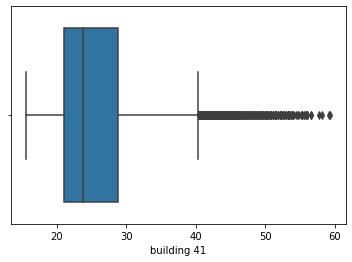

In [95]:
# Let's view the distribution of power data
sns.boxplot(power_data['building 41'])

Note that most of the data falls between 20-30 kW. 

#### Next let's create a heatmap to observe correlations between the various columns

(array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5, 10.5,
        11.5, 12.5, 13.5]),
 [Text(0.5, 0, 'month'),
  Text(1.5, 0, 'Hour'),
  Text(2.5, 0, 'DPT'),
  Text(3.5, 0, 'Relative Humidity'),
  Text(4.5, 0, 'Temp'),
  Text(5.5, 0, 'GSI'),
  Text(6.5, 0, 'DR'),
  Text(7.5, 0, 'Wind Speed'),
  Text(8.5, 0, 'MWGS'),
  Text(9.5, 0, 'Atmospheric Pressure'),
  Text(10.5, 0, 'Power'),
  Text(11.5, 0, 'IsWeekend'),
  Text(12.5, 0, 'IsSummer'),
  Text(13.5, 0, 'IsSpringOrFall')])

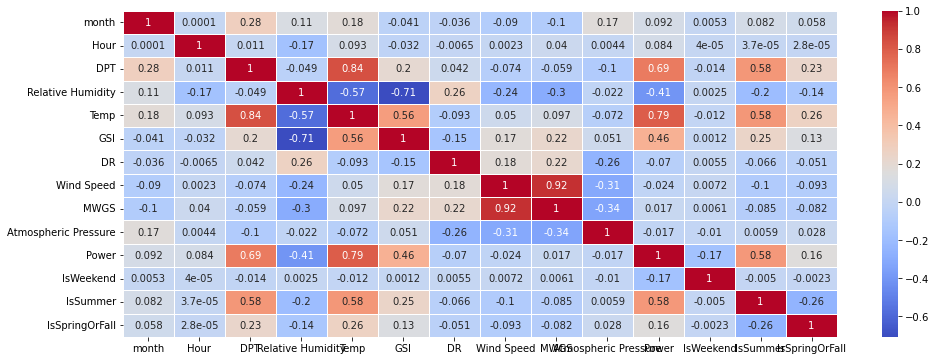

In [96]:
# heatmap
plt.figure(figsize = (16,6))
sns.heatmap(df.corr(),annot=True,linewidths=1,fmt='.2g',cmap='coolwarm')
plt.xticks(rotation='horizontal')

#### Observations:

Positive correlations:

- DPT (Due Point Temp.) - Temp (expected, both related to moisture in the air)
- Temp - Power (higher temp. = more energy use (A/C systems))
- Temp - Global Solar Irradiance (Higher temp. associated with clearer skies and more sunlight)
- IsSummer - Power (As expected in the hotter summer months more Power is used for A/C)

Negative correlations:

- Relative Humidity - Global Solar Irradiance (higher humidity = more cloud cover -> reduce amount of solar radiation reaching earth's surface)
- Temp - Relative Humidity (Warmer air can hold more moisture leading to lower RH if moisture levels don't increase proportionally)
- Wind Speed - Atmospheric Pressure (meterological phenomenon -  Generally, lower atmospheric pressure is associated with stormy and windy weather  conditions, while high pressure usually correlates with calmer and more stable weather. As the atmospheric pressure drops, it often indicates the approach of a weather system that can bring increased wind speeds).

#### Let's plot Energy consumption against temperature and humidity

In [97]:
# Perform time series operations in order to smooth out short term fluctuations and observe longer term trends.
# Resample data for weekly averages

power_weekly = df['Power'].resample('W').mean()

temp_weekly = df['Temp'].resample('W').mean()

RH_weekly = df['Relative Humidity'].resample('W').mean()

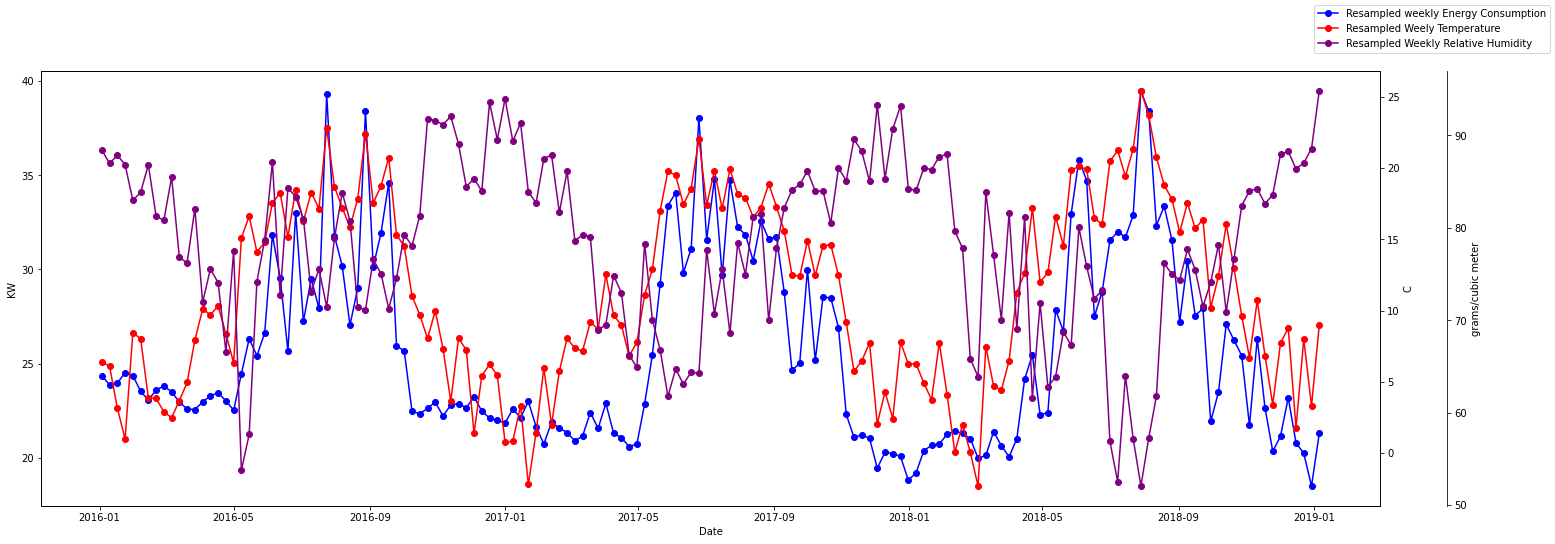

In [98]:
# Plot power consumption against relative humidity and temperature

fig,ax = plt.subplots(figsize=(24,8))
ax.plot(power_weekly.index, power_weekly, color='blue',marker='o')
ax.set_ylabel('KW')
ax.set_xlabel('Date')
ax2 = ax.twinx()
ax3 = ax.twinx()
ax2.plot(power_weekly.index, temp_weekly, color='red',marker='o')
ax2.set_ylabel('C')
ax3.plot(power_weekly.index, RH_weekly, color='purple',marker='o')
ax3.set_ylabel('grams/cubic meter')
ax3.spines['right'].set_position(('axes',1.05))
fig.legend(['Resampled weekly Energy Consumption',"Resampled Weely Temperature","Resampled Weekly Relative Humidity"],loc='upper right')


As seen in our heatmap, There is a strong positive correlation between temperature and power consumption, and a strong negative correlation between power and relative humidity

#### Let's visualize the Power Consumption averages per month and hour

Text(0, 0.5, 'Average Power Consumption (KW)')

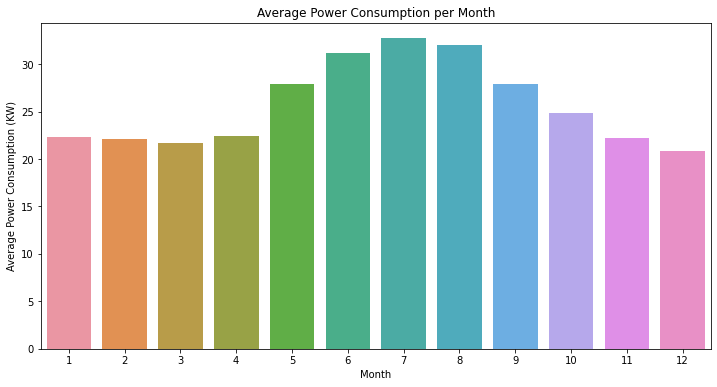

In [99]:
# Plot month against power consumption

power_monthly = df.groupby('month')['Power'].mean().reset_index()
plt.figure(figsize=(12, 6))
sns.barplot(x='month', y='Power', data=power_monthly)
plt.title('Average Power Consumption per Month')
plt.xlabel('Month')
plt.ylabel('Average Power Consumption (KW)')

Text(0, 0.5, 'Average Power Consumption (KW)')

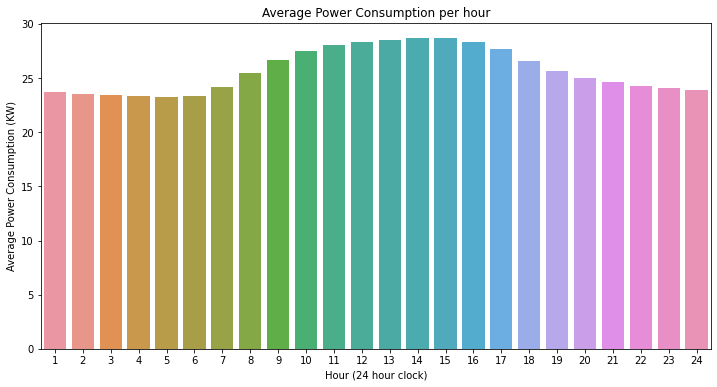

In [100]:
# plot Hour against power consumption

power_monthly = df.groupby('Hour')['Power'].mean().reset_index()
plt.figure(figsize=(12, 6))
sns.barplot(x='Hour', y='Power', data=power_monthly)
plt.title('Average Power Consumption per hour')
plt.xlabel('Hour (24 hour clock)')
plt.ylabel('Average Power Consumption (KW)')

As expected, power consumption is higher during the summer months when A/C is being used. It looks like average daily power consumption reaches a peak from 10 am - 5 pm. Which is strange considering most people wouldn't be home during those hours. This is an example of how a problem like this can vary from building to building, the strength of the model depends entriely on the data. A model for forecasting one building's demand is unlikely to be accurate to forecast another's.

## 4. Standardize Data and Train Test Split

Normalizing or Standardizing data is a critical step before passing the data into a model. This process brings different feature variables to a similar scale, preventing features with larger scales from dominating learning. For the Neural Network models we will be using later on, they make the gradient descent process more efficient by speeding up convergence. More on this later. 

In [164]:
# First we split the data into training and testing sets. 70% will be used to train, and 30% to test. 
# X represents the features, and y the labels
from sklearn.model_selection import train_test_split
weather_data = df.drop('Power',axis=1)
power_data = df[['Power']]
X_train, X_test, y_train, y_test = train_test_split(weather_data, power_data, test_size=0.3,random_state=0)
y_train = y_train.values.ravel()
y_test = y_test.values.ravel()

We will be using Scikit learn's StandardScaler for standardization. This technique scales the data to have a mean of 0 and a standard deviation of 1. The standard score of a sample X is calculated as:
#### Z = (X-mean)/Standard_deviation. 

Essentially for each datapoint we subtract the mean of that feature and divide it by the standard deviation. 

In [165]:
from sklearn.preprocessing import StandardScaler 
#standardizes the data so that the mean is equal to 0 and the standard deviation is 1.
SSCLR = StandardScaler()
X_train_scaled = SSCLR.fit_transform(X_train)
X_test_scaled = SSCLR.transform(X_test)

The decision to normalize label (target) data depends on your data and the model you're using. For this demo, I will choose not to so that we can more easily observe error metrics in the units we aim to predict (kW).

## 5. Machine Learning Models For Regression

### 5.1 Support Vector Regression Algorithm

Support Vector Machines are widely used for classification but can also be used for regression (SVR). I believe that this will work better than a classic linear regression model as we are working with non-linear data. The SVR algorithm aims to find a regression function (curve for non-linear data) that best fits the data, focusing on minimizing the error within a defined margin (epsilon). Points that fall outside this margin are regarded as erros and are punished. The stregnth of this penalty is controlled by a parameter "C". 

![SVR](images/SVR.png)

#### Let's optimize our model hyperparameters using GridSearchCV. 

GridsearchCV from scikit-learn is a tool for automatically tuning hyperparameters of ML models. It essentially searches over a specified parameter grid, evaluating models with each combination of parameters to identify the optimal combination for maximum performance. These searches can be made a lot faster with the use of powerful GPU's. Such instances can be run easily using Amazon Web Services

In [107]:
# Tune hyperparameters
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV

SVR_model = SVR(kernel='rbf')
check_parameters = {'C':[30,40,50], 'epsilon':[0.01,0.02,0.03],'gamma':[3,4,5]}

gscv = GridSearchCV(SVR_model, check_parameters, n_jobs=-1, cv=3)
gscv.fit(X_train_scaled,y_train)

gscv.best_params_


{'C': 30, 'epsilon': 0.03, 'gamma': 5}


In [110]:
# Use optimized parameters to train model
SVR_model = SVR(kernel='rbf',C=30,epsilon=0.03,gamma=5)

# train model and make predictions on test data
SVR_model.fit(X_train_scaled,y_train)
SVR_predictions = SVR_model.predict(X_test_scaled)

r2:  0.5288815127185985
MAE:  2.9449732558576667
RMSE:  4.316320021324273


Text(0, 0.5, 'kW')

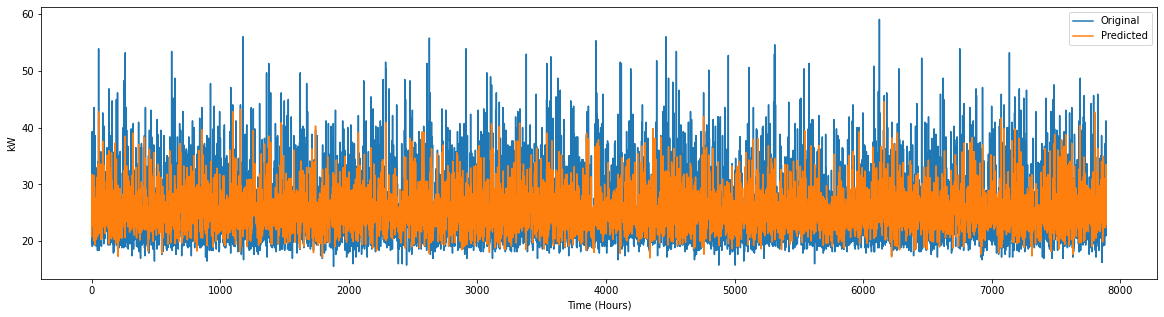

In [117]:
# Evaluate
SVR_MAE = mean_absolute_error(y_test,SVR_predictions)
print("r2: ", r2_score(y_test,SVR_predictions))
print("MAE: ", mean_absolute_error(y_test,SVR_predictions))
print("RMSE: ", np.sqrt(mean_squared_error(y_test,SVR_predictions)))
plt.figure(figsize = (20,5))
plt.plot(y_test, label="Original")
plt.plot(SVR_predictions, label="Predicted")
plt.legend(loc='best')
plt.xlabel('Time (Hours)')
plt.ylabel('kW')

This algorithm performs relatively poorly, as you can see it performs well for values within the higher density range from about 20-30 kW, but can't predict values outside of the average range. 

#### The three error metrics we will be using throughout this project are:
- r2 score: Essentially evaulates how well the data fits the regression model
- mean absolute error: The average error (difference) between actual (y_test) and predicted values
- root mean squared error: mean squared error works like mean absolute error except we take the average squares of errors. This is better for punishing large errors. We take the square root so that we can interpret it in terms of the units we're trying to predict (kW)

### 5.2 Random Forest Algorithm

The Random Forest Algorithm can be used for regression tasks. During training, the algorithm creates a certain number of decision trees. Each tree is trained on a random sample of the data. In each tree, every node is split using the best among a random subset of the features. For regression, the prediction of the random forest is the average of the predictions of all trees in the forest. For more on how decision trees work, visit this link: https://scikit-learn.org/stable/modules/tree.html#:~:text=Decision%20Trees%20(DTs)%20are%20a,as%20a%20piecewise%20constant%20approximation.

![RF](images/RF.png)

In [114]:
from sklearn.ensemble import RandomForestRegressor

RF_model = RandomForestRegressor(random_state=0)

# let's find the optimal depth for the model

check_parameters = {'max_depth':[30,40,50]}

gscv = GridSearchCV(RF_model,check_parameters,n_jobs=-1,cv=10)
gscv.fit(X_train_scaled,y_train)

gscv.best_params_

{'max_depth': 50}

r2:  0.930583554946896
MAE:  1.1903920758026352
RMSE:  1.6568368596999292


Text(0, 0.5, 'kW')

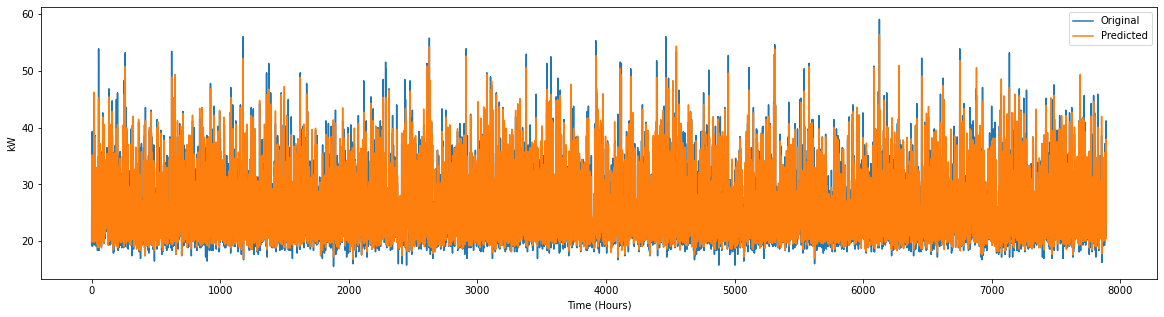

In [119]:
#Train model using optimal depth
RF_model = RandomForestRegressor(max_depth=50, random_state=0)
RF_model.fit(X_train_scaled,y_train)

# predict with test data
RF_predictions = RF_model.predict(X_test_scaled)

# Evaluate
RF_MAE = mean_absolute_error(y_test,RF_predictions)
print("r2: ", r2_score(y_test,RF_predictions))
print("MAE: ", mean_absolute_error(y_test,RF_predictions))
print("RMSE: ", np.sqrt(mean_squared_error(y_test,RF_predictions)))
plt.figure(figsize = (20,5))
plt.plot(y_test, label="Original")
plt.plot(RF_predictions, label="Predicted")
plt.legend(loc='best')
plt.xlabel('Time (Hours)')
plt.ylabel('kW')

As you can see, this model performs far more accurately than the support vector model. Random Forest's ensemble use of decision trees may be better for handling non-linear relationships in this dataset than the SVR algorithm. 

## 6. Deep Learning Neural Network Models for Regression

Deep learning is a subset of machine learning where artificial neural networks (algorithms inspired by the structure and function of the brain) learn from large amounts of data. At the heart of these networks is the perceptron model, a simple type of artificial neuron that uses a linear equation (weighted sum of inputs, plus a bias) to generate an output (y=w1X1 + w2X2). When perceptrons are layered to form a network, they create a feed-forward Artificial Neural Network (ANN) or Deep Neural Network (DNN). In these networks, information moves in one direction: from input nodes, through one or more hidden layers of perceptrons (each performing its own simple transformation), to the output layer. Each layer's output is the input for the next layer. This architecture allows the network to model complex patterns and relationships in data, making it highly effective for a wide range of tasks like regression, image and speech recognition, and language processing.

### Perceptron model:
![perceptron](images/perceptron.png)

### Neural Network with multiple hidden layers and one output neuron similar to the one we will attempt to build:
![ANN](images/ANN.png)

In [124]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,LSTM

### 6.1 Feed Forward Deep Neural Network

In [125]:
import keras_tuner as kt
import tensorflow as tf

We will use the keras tuner to automatically tune the hyperparameters for our model. Here we ask the Keras API to find the optimal number of layers, neurons in each layer, and the optimal learning rate. 

In [132]:
def build_model(hp):
    model = Sequential()
    # Tune the number of layers
    for i in range(hp.Int('num_layers',2,5)):
        model.add(Dense(units=hp.Int('units_' + str(i), min_value=32, max_value=512, step=32),
                        activation='relu'))
        
    model.add(Dense(1))
    
    # Tune the learning rate
    hp_learning_rate = hp.Float('learning_rate',min_value=1e-4,max_value=1e-2,sampling='log')
    
    # Assign the model to use the Adam optimizer
    model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=hp_learning_rate),
                  loss='mean_squared_error',
                  metrics=['mae'])
                  
    return model

#### We build the model with the following parameters:

 - Dense: Dense specifies that we're using a classinc neural network architecure like the one described above where every neuron in a layer is connected to every neuron in the previous layer. It will compute the weighted sum of it's input and optionally add a bias term => y = w1X1 + w2X2 +...+ wnXn + b. It then passes y into an activation function.
 
 
 
 - Activation Function: So far these neuron's outputs are linear. An activation function introduces non-linear properties to the model enabling it to learn complex patterns. We use the Rectified Linear Unit ( f(x) = max(0,x) ), a standard activation function for regression with ANN's, that ensures the Neuron's output can never be negative. ReLU is particualry good at mitigating the vanishing gradient problem common in Deep Neural Networks such as this one. For more on the vanishing gradient problem and how ReLU can solve it, see here: https://towardsdatascience.com/the-vanishing-gradient-problem-69bf08b15484

- Adam Optimizer: This optimizer uses stochastic gradient descent a form of gradient descent to optimize our model.For those who don't understand partial differential calculus, imagine we are in a mountainous valley and we want to find the lowest point in the valley. A gradient is like a compass which always points in whichever direction is the steepest. The descent part means we take steps downwards towards the valley in the steepest direction to reach the lowest point in the valley. Adam optimizer is a technique which uses this special compass, it uses an algorithm called "Backpropagation" to calculate the gradient of our loss function (model error) with respect to the weights in our network, the Adam optimizer then uses these gradients to update the weights and minimize the loss function. Adam is unique in that it can adjust the learning rate for each weight individually.


- Learning Rate: Learning rate allows us to reach the point at which our loss function is minimized as efficiently as possible, too fast and we risk overshooting the minimum, too slow and we may converge at the wrong point on the loss function. 


In [133]:
# initialize the tuner

tuner = kt.Hyperband(
    build_model,
    objective='val_loss',
    max_epochs=10,
    factor=3,
    directory='keras_tuner_dierr',
    project_name='keras_tuner_demode'
)

Reloading Tuner from keras_tuner_dierr\keras_tuner_demode\tuner0.json


In [134]:
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss',patience=20,restore_best_weights=True)

Early stopping allows us to stop training if we begin to overfit to the training data. This happens when our model begins memorizing the training data rather than learning patterns in that data.

In [136]:
tuner.search(X_train_scaled,y_train,epochs=50,validation_split=0.1,callbacks=[early_stopping])

In [137]:
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]

In [138]:
print(best_hps.get('num_layers'))
print(best_hps.get('units_1'))
print(best_hps.get('units_2'))
print(best_hps.get('units_3'))
print(best_hps.get('learning_rate'))


3
384
352
224
0.0018324337625857986


The keras tuner is telling us that the optimal architecture for a DNN model for our data is one with 5 layers (input, 3 hidden, output), with 3, 384, 352, 224, and 1 neuron respectively. Since this is a regression model, we always have an output layer of 1 neuron which is our final prediction value. We also get the optimal learning rate

In [542]:
# Build the model with the optimal neuron configuration
 
model = tuner.hypermodel.build(best_hps)

history = model.fit(
    X_SS, y_train,
    epochs=400, 
    batch_size=32,
    validation_split=0.1,
    callbacks=[tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=20, restore_best_weights=True)],
    verbose=1
)

optimal_epochs = np.argmin(history.history['val_loss']) + 1
print(f"Optimal number of epochs: {optimal_epochs}")

Epoch 1/400
518/518 [==============================] - 10s 17ms/step - loss: 15.3681 - mae: 2.4835 - val_loss: 4.6541 - val_mae: 1.6637
Epoch 2/400
518/518 [==============================] - 8s 15ms/step - loss: 5.0500 - mae: 1.7507 - val_loss: 4.6878 - val_mae: 1.6776
Epoch 3/400
518/518 [==============================] - 4s 8ms/step - loss: 4.8640 - mae: 1.7133 - val_loss: 4.2597 - val_mae: 1.6123
Epoch 4/400
518/518 [==============================] - 6s 12ms/step - loss: 4.6400 - mae: 1.6721 - val_loss: 4.5484 - val_mae: 1.6693
Epoch 5/400
518/518 [==============================] - 7s 14ms/step - loss: 4.3763 - mae: 1.6175 - val_loss: 4.2437 - val_mae: 1.6097
Epoch 6/400
518/518 [==============================] - 8s 16ms/step - loss: 4.2180 - mae: 1.5871 - val_loss: 5.1819 - val_mae: 1.7211
Epoch 7/400
518/518 [==============================] - 8s 16ms/step - loss: 4.1272 - mae: 1.5715 - val_loss: 3.8348 - val_mae: 1.5470
Epoch 8/400
518/518 [==============================] - 8s 15m

Epoch 62/400
518/518 [==============================] - 8s 14ms/step - loss: 2.3061 - mae: 1.1501 - val_loss: 2.9667 - val_mae: 1.2933
Epoch 63/400
518/518 [==============================] - 7s 14ms/step - loss: 2.3029 - mae: 1.1500 - val_loss: 2.8599 - val_mae: 1.2771
Epoch 64/400
518/518 [==============================] - 7s 13ms/step - loss: 2.2154 - mae: 1.1253 - val_loss: 2.8844 - val_mae: 1.2835
Epoch 65/400
518/518 [==============================] - 7s 13ms/step - loss: 2.2025 - mae: 1.1206 - val_loss: 2.9246 - val_mae: 1.2927
Epoch 66/400
518/518 [==============================] - 7s 13ms/step - loss: 2.2454 - mae: 1.1353 - val_loss: 2.8942 - val_mae: 1.2928
Epoch 67/400
518/518 [==============================] - 7s 14ms/step - loss: 2.2527 - mae: 1.1372 - val_loss: 2.8030 - val_mae: 1.2600
Epoch 68/400
518/518 [==============================] - 7s 14ms/step - loss: 2.2610 - mae: 1.1420 - val_loss: 2.7704 - val_mae: 1.2638
Epoch 69/400
518/518 [==============================] -

In [166]:
hypermodel = tuner.hypermodel.build(best_hps)

hypermodel.fit(X_train_scaled,y_train,epochs=75,validation_split=0.05)

Epoch 1/75
547/547 [==============================] - 4s 7ms/step - loss: 15.5382 - mae: 2.4917 - val_loss: 8.1489 - val_mae: 2.1529
Epoch 2/75
547/547 [==============================] - 3s 6ms/step - loss: 5.0750 - mae: 1.7530 - val_loss: 4.9677 - val_mae: 1.7121
Epoch 3/75
547/547 [==============================] - 3s 6ms/step - loss: 4.5944 - mae: 1.6653 - val_loss: 4.8296 - val_mae: 1.7087
Epoch 4/75
547/547 [==============================] - 3s 6ms/step - loss: 4.4756 - mae: 1.6360 - val_loss: 4.1181 - val_mae: 1.5720
Epoch 5/75
547/547 [==============================] - 3s 6ms/step - loss: 4.3508 - mae: 1.6145 - val_loss: 5.0279 - val_mae: 1.7046
Epoch 6/75
547/547 [==============================] - 3s 6ms/step - loss: 4.2896 - mae: 1.6023 - val_loss: 4.2703 - val_mae: 1.5329
Epoch 7/75
547/547 [==============================] - 4s 7ms/step - loss: 4.1900 - mae: 1.5874 - val_loss: 3.9469 - val_mae: 1.5064
Epoch 8/75
547/547 [==============================] - 4s 7ms/step - loss: 3

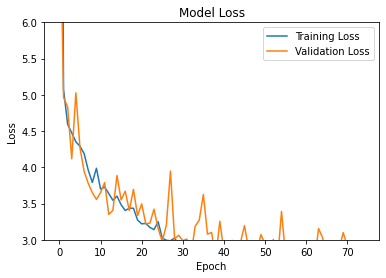

In [167]:
losses = pd.DataFrame(hypermodel.history.history)

# Plotting the training and validation loss from the DataFrame
plt.plot(losses['loss'], label='Training Loss')
plt.plot(losses['val_loss'], label='Validation Loss')

# Set the limits for the y-axis to zoom in
plt.ylim([3, 6])  # Adjust the range as needed

plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()


We can see spiking in our validation data. This may be due to our validation dataset being too small. Both Training and validation loss appear to converge which is a good sign that we aren't overfitting.

In [168]:
# predict on test data
hypermodel_predictions = hypermodel.predict(X_test_scaled)

247/247 [==============================] - 1s 3ms/step


r2:  0.9285034917533714
MAE:  1.264551960734787
RMSE:  1.6814771866492622
EXPLAINED VARIANCE:  0.9285340036271804
Accuracy:  95.07860093589458 %


Text(0, 0.5, 'kW')

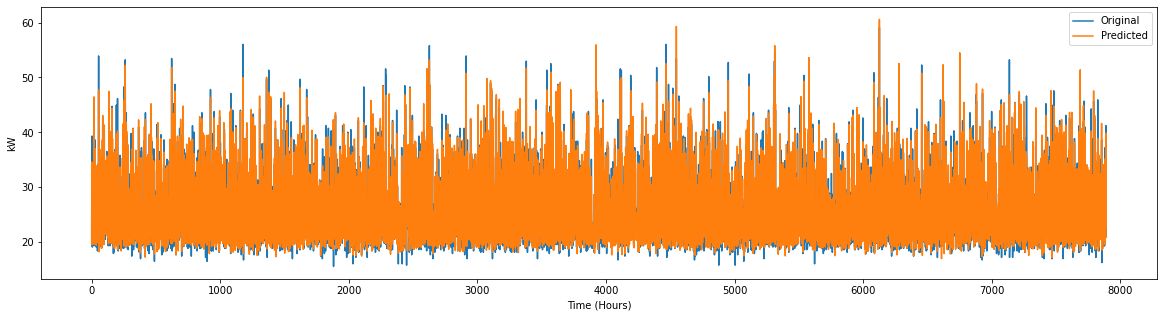

In [169]:
# # Evaluate
DNN_MAE = mean_absolute_error(y_test,hypermodel_predictions)
print("r2: ", r2_score(y_test,hypermodel_predictions))
print("MAE: ", mean_absolute_error(y_test,hypermodel_predictions))
print("RMSE: ", np.sqrt(mean_squared_error(y_test,hypermodel_predictions)))
print("EXPLAINED VARIANCE: ",explained_variance_score(y_test,hypermodel_predictions))
print("Accuracy: ",100-(100*mean_absolute_error(y_test,hypermodel_predictions))/(df['Power'].mean()),'%')
plt.figure(figsize = (20,5))
plt.plot(y_test, label="Original")
plt.plot(hypermodel_predictions, label="Predicted")
plt.legend(loc='best')
plt.xlabel('Time (Hours)')
plt.ylabel('kW')


This model performs very well, similar in it's error metrics to the Random Forest algorithm seen earlier

### 6.2 Recurrent Neural Network (RNN) with LSTM

Shifting our algorithm from a standard neural network for regression to one that is commonly effective for time series forecasting may outperform a standard ANN/DNN. Recurrent Neural Networks (RNN's) are a type of neural network designed for processing sequential data such as time series. Unlike feed-forward ANN's which process inputs without any regard for previous or future inputs, RNNs have loops which allow information (state) to persist from one step of the sequence to the next, which makes them ideal for problems where the order of data is important. This loop creates a form of memory where connections feed the output of a neuron back into itself across time intervals. The output of a neuron at one time step becomes part of its input at the next time step. RNNs are often prone to the vanishing gradient problem discussed earlier. We can address this issue with Long Short-Term Memory (LSTM) networks, a specialized RNN. LSTM's include memory "cells" that can maintain information in memory for long periods. 

#### In an RNN, Neurons feed information back into themselves over time sequences:


![RNN](images/RNN.png)

Before passing our data into the model we must separate it into sequences. We'll do 24 hour intervals. To split the data into proper subsets let's first ensure the features are scaled and turn this back into a dataframe

In [171]:
features = df.drop('Power',axis=1)
labels = df['Power']

In [172]:
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

In [173]:
features_df = pd.DataFrame(features_scaled,columns=features.columns)
df_scaled = pd.concat([features_df,labels.reset_index(drop=True)],axis=1)

In [174]:
df_scaled

,month,Hour,DPT,Relative Humidity,Temp,GSI,DR,Wind Speed,MWGS,Atmospheric Pressure,IsWeekend,IsSummer,IsSpringOrFall,Power
0,-1.601129,-1.661317,-0.564093,0.234380,-0.626228,-0.62703,-0.309381,-0.286053,0.221556,0.656696,-0.633684,-0.580175,-0.447713,23.783228
1,-1.601129,-1.516849,-0.479403,0.292123,-0.572810,-0.62703,-0.309381,0.193675,0.519871,0.698599,-0.633684,-0.580175,-0.447713,23.783228
2,-1.601129,-1.372381,-0.428590,0.754067,-0.719710,-0.62703,-0.309381,-0.286053,0.519871,0.740503,-0.633684,-0.580175,-0.447713,23.783228
3,-1.601129,-1.227914,-0.597968,1.042783,-0.946736,-0.62703,-0.309381,-0.765781,-0.673389,0.792882,-0.633684,-0.580175,-0.447713,23.783228
4,-1.601129,-1.083446,-0.581031,1.158269,-0.973445,-0.62703,-0.309381,-0.765781,-0.971704,0.824309,-0.633684,-0.580175,-0.447713,23.783228
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26298,1.588309,0.939104,0.113422,0.869554,-0.345784,-0.62703,-0.309381,-0.286053,-0.076759,1.882365,-0.633684,-0.580175,-0.447713,18.602723
26299,1.588309,1.083572,0.045670,0.811811,-0.372493,-0.62703,-0.309381,-0.286053,-0.375074,1.850938,-0.633684,-0.580175,-0.447713,18.838200
26300,1.588309,1.228040,-0.089833,0.638581,-0.412556,-0.62703,-0.309381,0.193675,-0.076759,1.829986,-0.633684,-0.580175,-0.447713,18.602723
26301,1.588309,1.372508,-0.055957,0.927297,-0.492683,-0.62703,-0.309381,0.193675,0.221556,1.788083,-0.633684,-0.580175,-0.447713,18.131768


This function separates our dataframe into 24 hour sequences separated by features (X) and label (y)

In [175]:
def create_sequences(data, target_column,steps_in,steps_out):
    X,y = [], []
    for i in range(len(data) - steps_in - steps_out + 1):
        X.append(data.iloc[i:i + steps_in].drop(target_column,axis=1).values)
        y.append(data.iloc[i + steps_in:i + steps_in + steps_out][target_column].values)
        
    return np.array(X), np.array(y)
        

In [176]:
train_df, test_df = train_test_split(df_scaled, test_size=0.3, shuffle=False)

In [177]:
# Steps in, steps out = 24,1 asserts that we will use the past 24 hours to predict the next hour.
steps_in, steps_out = 24,1
power_index = df_scaled.columns.get_loc('Power')

In [178]:
# separate labels from feature data
X_train, y_train = create_sequences(train_df, 'Power', steps_in, steps_out)
X_test, y_test = create_sequences(test_df, 'Power', steps_in, steps_out)

In [179]:
# Build model

RNN_model = Sequential()
RNN_model.add(LSTM(50,activation='relu',input_shape=(24,13)))
RNN_model.add(Dense(1))

early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss',patience=10,mode='min')
RNN_model.compile(optimizer='adam',loss='mean_squared_error',metrics=['mae'])

history = RNN_model.fit(X_train,y_train,epochs=50,batch_size=32,validation_split=0.1,callbacks=[early_stopping])

Epoch 1/50
518/518 [==============================] - 10s 17ms/step - loss: 64.6496 - mae: 4.3237 - val_loss: 7.7597 - val_mae: 2.3381
Epoch 2/50
518/518 [==============================] - 8s 16ms/step - loss: 5.0339 - mae: 1.6932 - val_loss: 8.3214 - val_mae: 2.5138
Epoch 3/50
518/518 [==============================] - 9s 16ms/step - loss: 3.5818 - mae: 1.4438 - val_loss: 6.0387 - val_mae: 2.0877
Epoch 4/50
518/518 [==============================] - 9s 17ms/step - loss: 3.2134 - mae: 1.3657 - val_loss: 10.8222 - val_mae: 2.9818
Epoch 5/50
518/518 [==============================] - 8s 16ms/step - loss: 2.7774 - mae: 1.2755 - val_loss: 12.2317 - val_mae: 3.2082
Epoch 6/50
518/518 [==============================] - 8s 16ms/step - loss: 2.5930 - mae: 1.2377 - val_loss: 5.3335 - val_mae: 1.9401
Epoch 7/50
518/518 [==============================] - 9s 17ms/step - loss: 2.4158 - mae: 1.1998 - val_loss: 9.2182 - val_mae: 2.6862
Epoch 8/50
518/518 [==============================] - 8s 16ms/ste

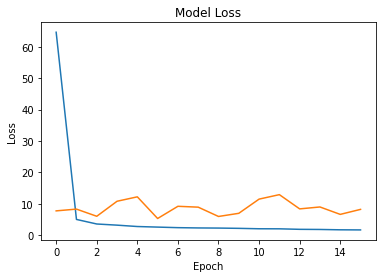

246/246 [==============================] - 2s 7ms/step - loss: 7.0230 - mae: 2.0438


[7.023036003112793, 2.0438404083251953]

In [180]:
# Plot training & validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.show()

# Evaluate the model on test data
RNN_model.evaluate(X_test, y_test)

In [181]:
predictions = RNN_model.predict(X_test)
predictions.shape

246/246 [==============================] - 2s 6ms/step


(7867, 1)

In [571]:
y_test.shape

(7867, 1)

r2:  0.8504451068520323
MAE:  2.043840345495914
RMSE:  2.650100947032431
EXPLAINED VARIANCE:  0.8656337852935023
Accuracy:  92.2005951434053 %


Text(0, 0.5, 'kW')

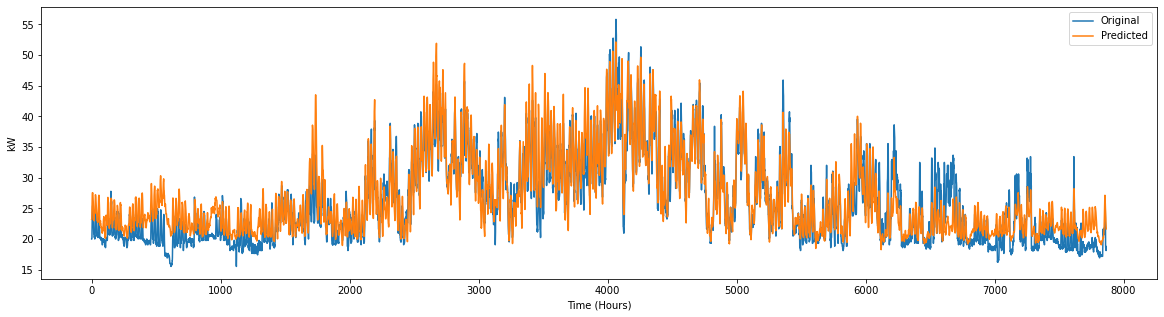

In [182]:
# Evaluate
RNN_MAE = mean_absolute_error(y_test,predictions)
print("r2: ", r2_score(y_test,predictions))
print("MAE: ", mean_absolute_error(y_test,predictions))
print("RMSE: ", np.sqrt(mean_squared_error(y_test,predictions)))
print("EXPLAINED VARIANCE: ",explained_variance_score(y_test,predictions))
print("Accuracy: ",100-(100*mean_absolute_error(y_test,predictions))/(y_test.mean()),'%')
plt.figure(figsize = (20,5))
plt.plot(y_test, label="Original")
plt.plot(predictions, label="Predicted")
plt.legend(loc='best')
plt.xlabel('Time (Hours)')
plt.ylabel('kW')

The RNN performs significantly worse than the feed-forward DNN. We can try to optimize the hyperparameters of the RNN to improve the error but it's likely that this type of algorithm is too complicated for this data. 

## 7. Evaluating Performance

In [187]:
models = ['SVR', "RF", "DNN", "RNN"]
metrics = [SVR_MAE, RF_MAE,DNN_MAE,RNN_MAE]

Text(0.5, 1.0, 'Mean Absolute Error of Model Predictions On Test Data')

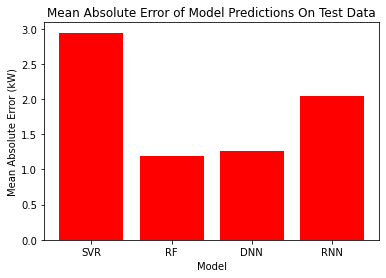

In [196]:
plt.bar(models,metrics,color='red')
plt.xlabel('Model')
plt.ylabel('Mean Absolute Error (kW)')
plt.title('Mean Absolute Error of Model Predictions On Test Data')

### 8. Conclusion

It can be observed that for this particular dataset, the Random Forest algorithm performed the best followed closely by the Deep Neural Network. Both models were able to accurately predict Power demand to within about a kW. If we take the average error (mean absolute error) of these models and take it as a percentage of the average kW value of the test data we're trying to predict, we get that both models performed with about 95-96% accuracy. The RNN performed significantly worse even though it's commonly used for time series due to it's ability to remember sequences. Most likely this is too complex a model for this data. The worst performing algorithm was the Support Vector Machine regression algorithm. Different Algorithms will perform better for different building's data making this type of problem challenging because you must collect enough data from each independant building you're trying to forecast demand for, and then find the best algorithmic fit for each of those datasets.

Predicitng demand not only for regions of the grid but also singular buildings power service's is a great strategy for EV charge point operators to build charging schedules for resident vehicles to charge with the most power that can be available to them as inexpensivley as possible.